Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so a dataset has been created, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting, which you prefer and for what cases. 

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data

### 0. Read in the data 

In [5]:
# Your solution goes here
df_chicken = pd.read_csv("chicken.csv")

### 1. Weight by diet summary stats (Pandas groupby and describe)

In [6]:
# Your solution goes here
df_chicken.groupby('diet')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [8]:
# Your solution goes here
df_chicken.groupby('diet')['eggs'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

(array([ 5., 13., 28., 52., 65., 61., 45., 40., 34., 17.]),
 array([135. , 143.2, 151.4, 159.6, 167.8, 176. , 184.2, 192.4, 200.6,
        208.8, 217. ]),
 <BarContainer object of 10 artists>)

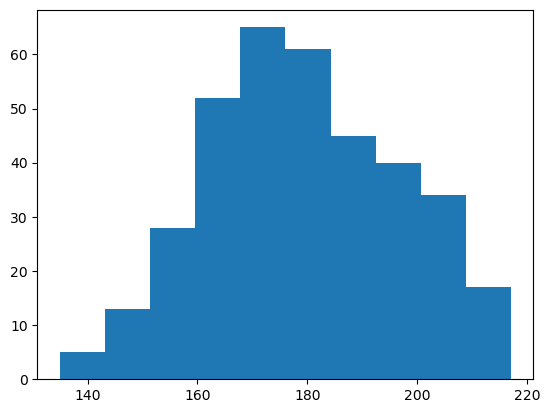

In [9]:
# Your solution goes here

plt.hist(df_chicken['age'])

### 3.2 Histogram of age of chickens (Seaborn distplot())

/var/folders/sw/16_tdllj1b3fzp8kfp55ys2h0000gn/T/ipykernel_80853/531222165.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chicken['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

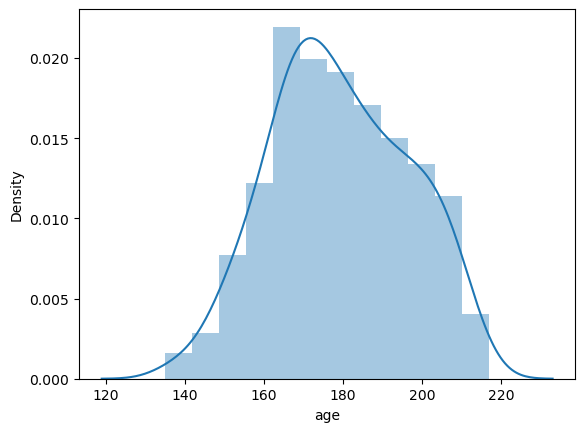

In [14]:
# Your solution goes here

sns.distplot(df_chicken['age'])

### 4.1 Boxplot age (Pandas boxplot())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d2a12b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d2a12b730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d59fb6f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d2a12bc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d2a12bf10>],
 'means': []}

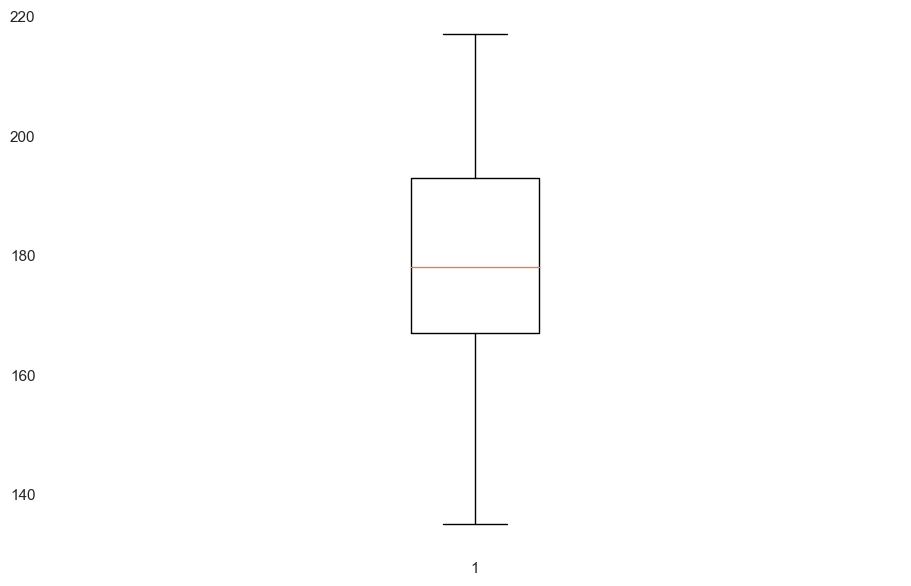

In [48]:
# Your solution goes here

plt.boxplot(df_chicken['age'])

### 4.2 Boxplot age (Seaborn boxplot())

<AxesSubplot: ylabel='age'>

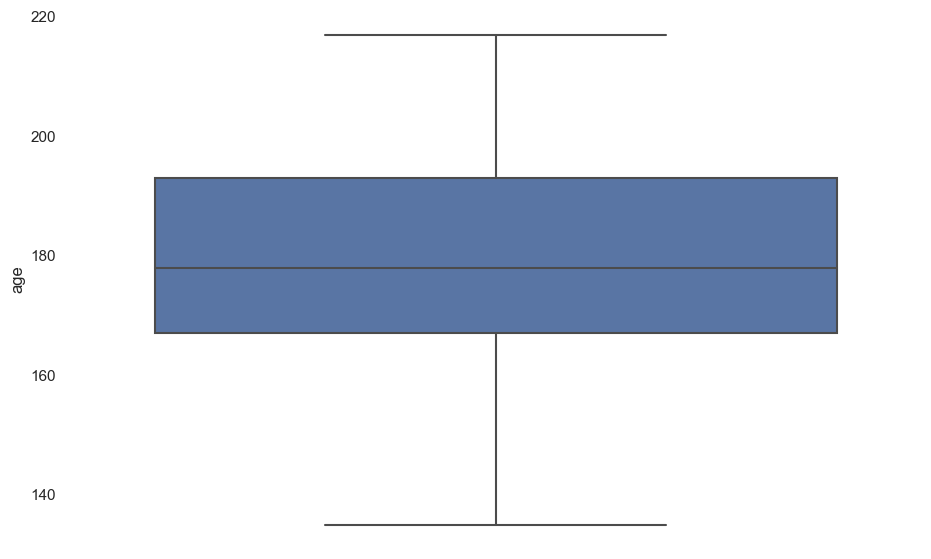

In [50]:
# Your solution goes here

sns.boxplot(y=df_chicken['age'])

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

<AxesSubplot: xlabel='week'>

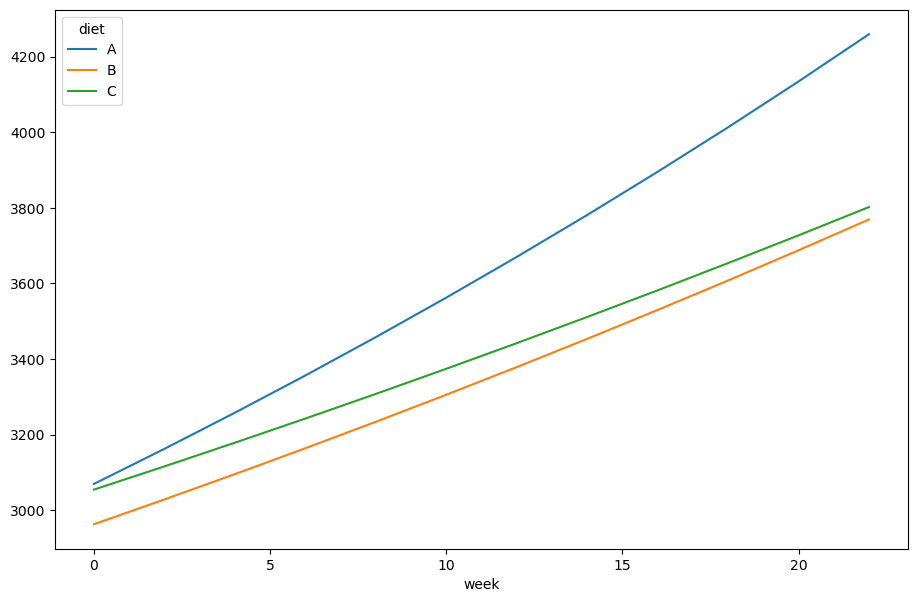

In [17]:
# Your solution goes here

fig, ax=plt.subplots(figsize=(11, 7))

df_chicken.groupby(['week', 'diet']).mean()['weight'].unstack().plot(ax=ax)

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

<AxesSubplot: xlabel='week', ylabel='weight'>

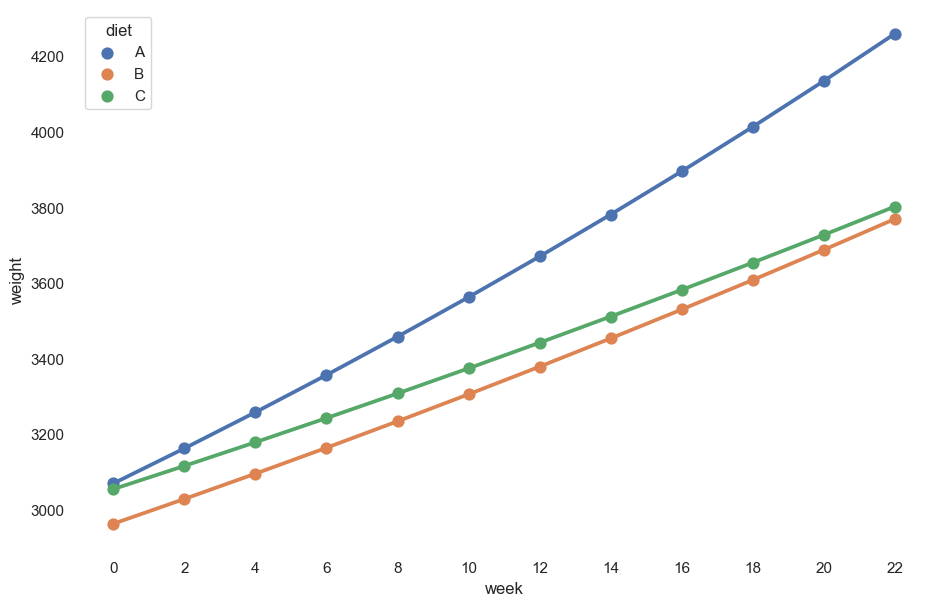

In [19]:
# Your solution goes here


sns.set(rc={'figure.figsize':(11,7), 'figure.facecolor':'white', 'axes.facecolor':'white'})
sns.pointplot(data=df_chicken, x='week', y='weight', hue='diet', errorbar=None)

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

<AxesSubplot: xlabel='week'>

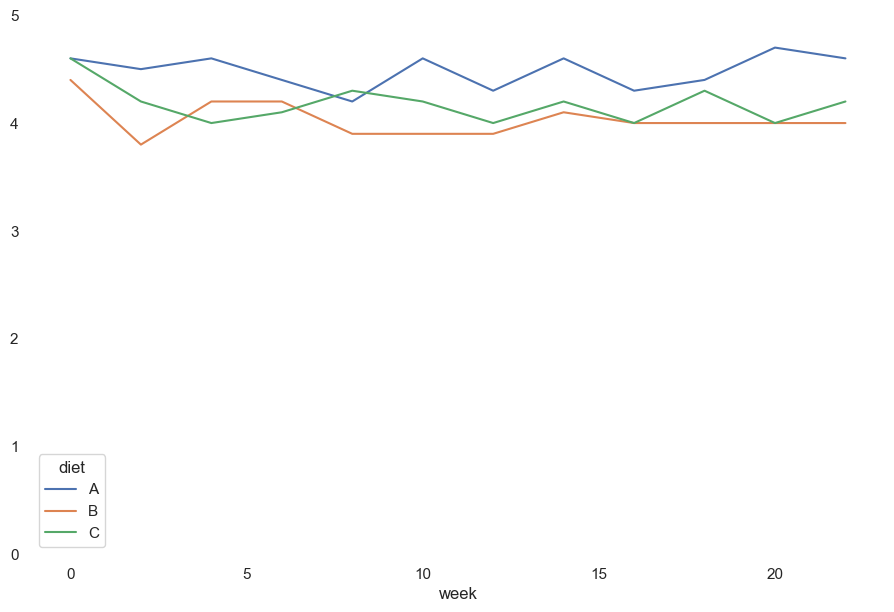

In [21]:
# Your solution goes here

fig, ax=plt.subplots(figsize=(11, 7))
ax.set_ylim([0, 5])

df_chicken.groupby(['week', 'diet']).mean()['eggs'].unstack().plot(ax=ax)

### 6.2 Plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

<AxesSubplot: xlabel='week', ylabel='eggs'>

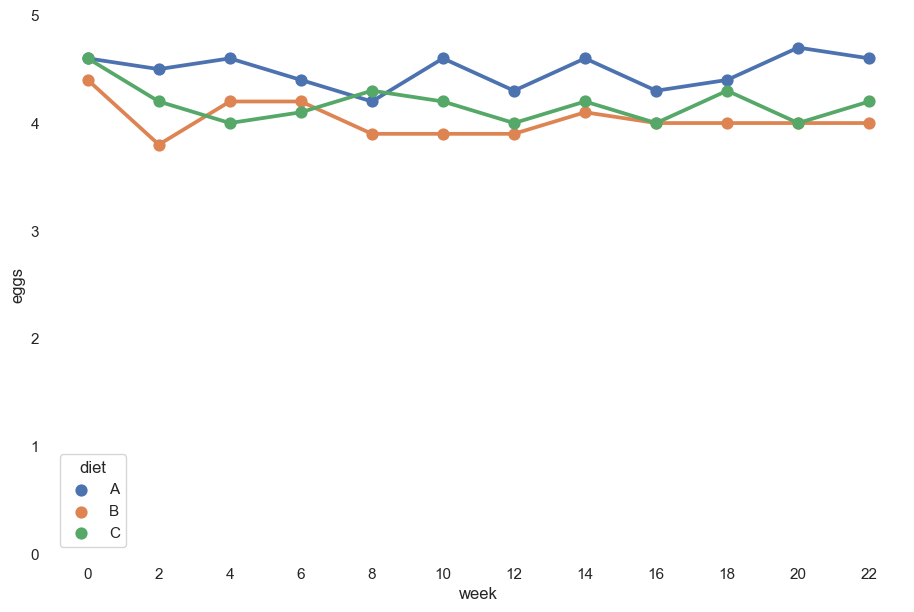

In [24]:
# Your solution goes here

sns.set(rc={'figure.figsize':(11,7), 'figure.facecolor':'white', 'axes.facecolor':'white'})
plt.ylim(0, 5)
sns.pointplot(data=df_chicken, x='week', y='eggs', hue='diet', errorbar=None)

### 7. Average age by diet stats (Pandas groupby())

In [25]:
# Your solution goes here

df_chicken.groupby('diet')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,166.5,12.579161,135.0,157.0,167.0,176.25,189.0
B,120.0,187.9,15.227905,155.0,175.0,189.5,200.00,217.0
C,120.0,183.4,16.282382,152.0,170.0,183.5,196.25,215.0


### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


(130.9, 221.1, 2.9, 5.1)

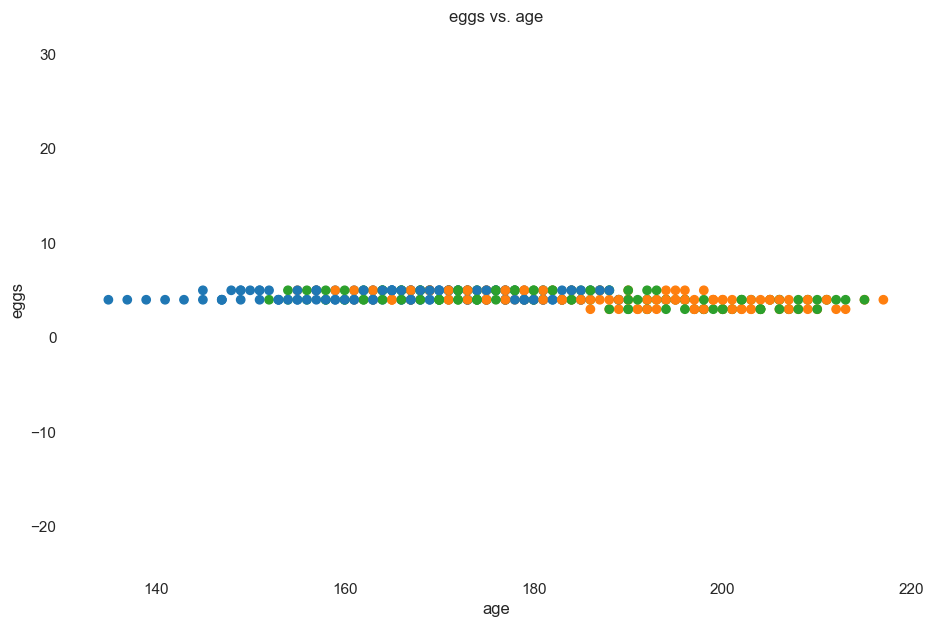

In [27]:
# Your solution goes here

fig, ax=plt.subplots(figsize=(11, 7))

colors = {'A':'tab:blue', 'B':'tab:orange', 'C':'tab:green'}

ax.scatter(df_chicken['age'], df_chicken['eggs'], c=df_chicken['diet'].map(colors))
plt.gca().set(xlabel='age', ylabel='eggs', title='eggs vs. age')
plt.gca().axis('equal')

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


(-20.0, 20.0)

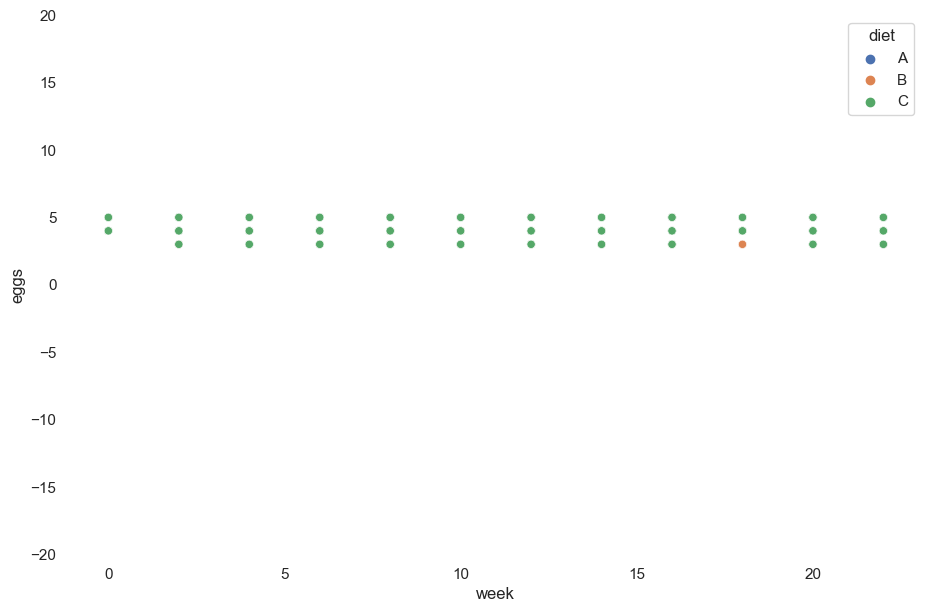

In [32]:
# Your solution goes here

sns.set(rc={'figure.figsize':(11,7), 'figure.facecolor':'white', 'axes.facecolor':'white'})
sns.scatterplot(data=df_chicken, x='week', y='eggs', hue='diet', ec=None)
plt.ylim(-20, 20)

### 9.1 Boxplot age by diet (Pandas boxplot())

<AxesSubplot: title={'center': 'age'}, xlabel='diet'>

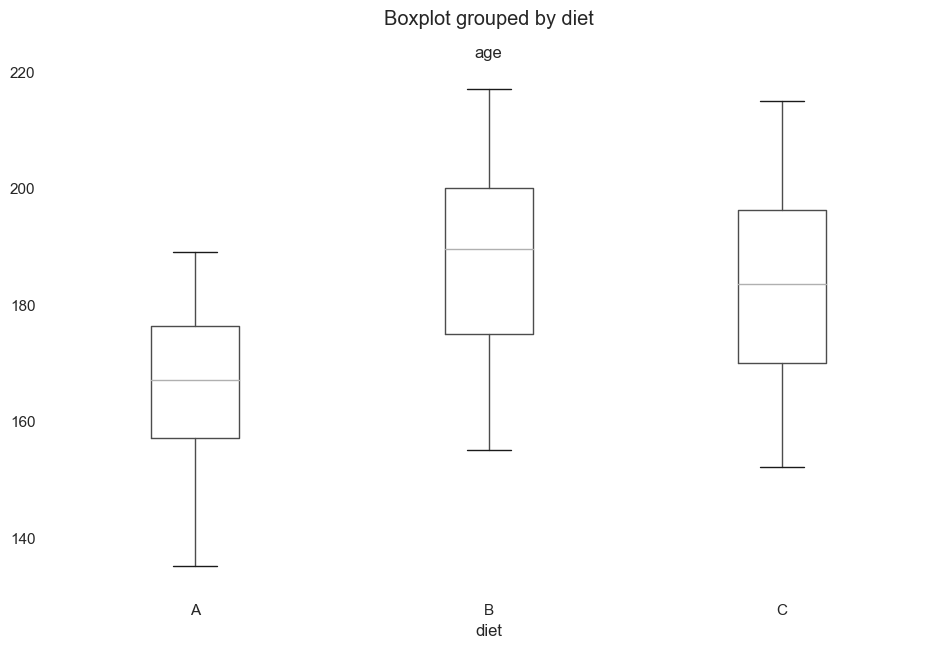

In [29]:
# Your solution goes here

df_chicken.boxplot(column='age', by='diet')

### 9.2 Boxplot age by diet (Seaborn boxplot())

<AxesSubplot: xlabel='age', ylabel='diet'>

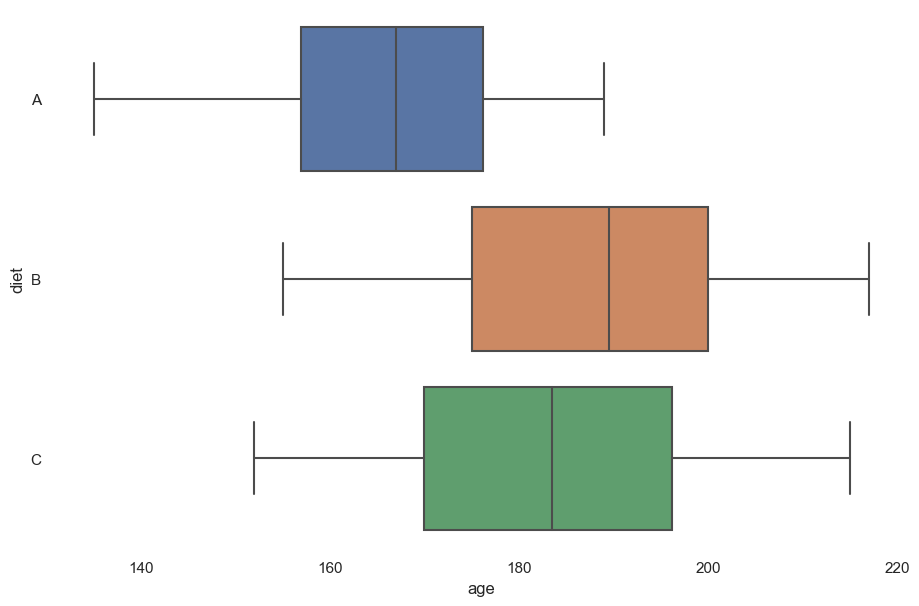

In [30]:
# Your solution goes here

sns.boxplot(data=df_chicken, x="age", y="diet")

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when would you use Seaborn?

**Your answers can go here:**


1. Pandas is efficient when handling large dataframes with an extensive set of features. However, pandas has a weakness of not being able to read multiple CSV files at once.
  
2. Seaborn is strong in being able to easily plot statistical data with very few lines of code. However, when it comes to small datasets, the bootstrap algorithm that it uses may be less accurate when representing data.
  
3. I would probably use Pandas when looking at statistics in a table such as aggregation stats. However, when it comes to visualization, I would use seaborn to represent my data over matplotlib itself because seaborn extends matplotlib and creates much better visualizations.






